# Assignment 5: Exploratory Data Analysis and Hypothesis Testing

**Student:** Nora Amer   
**Dataset:** Online Shopping Intention
**Date:** 10/4/25

## Objective
Perform exploratory data analysis (EDA) and hypothesis testing on your chosen dataset. Identify patterns and test meaningful hypotheses about relationships between variables.

# Importing Libraries

In [20]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")

Libraries imported successfully!


# Reading Online Shopping Intent Dataset

In [21]:
df_original = pd.read_csv('online_shoppers_intention.csv') # reading dataset

df = df_original.copy() #copying dataset to preserve original data

df.head() # displaying first 5 rows of the dataset!!



,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Basic Exploratory Analysis!

In [31]:
# basic information about the dataset

print(f"Shape: {df.shape}")

print(df.isnull().sum())

print(df.dtypes)



Shape: (12330, 20)
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
Revenue_int                0
SpecialDay_bin             0
dtype: int64
Administrative                int64
Administrative_Duration     float64
Informational                 int64
Informational_Duration      float64
ProductRelated                int64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
Month                       

In [32]:
# Summary of numerical features
print(df.describe())

# Summary of categorical features
print(df.describe(include=['object', 'bool']))


       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.00000

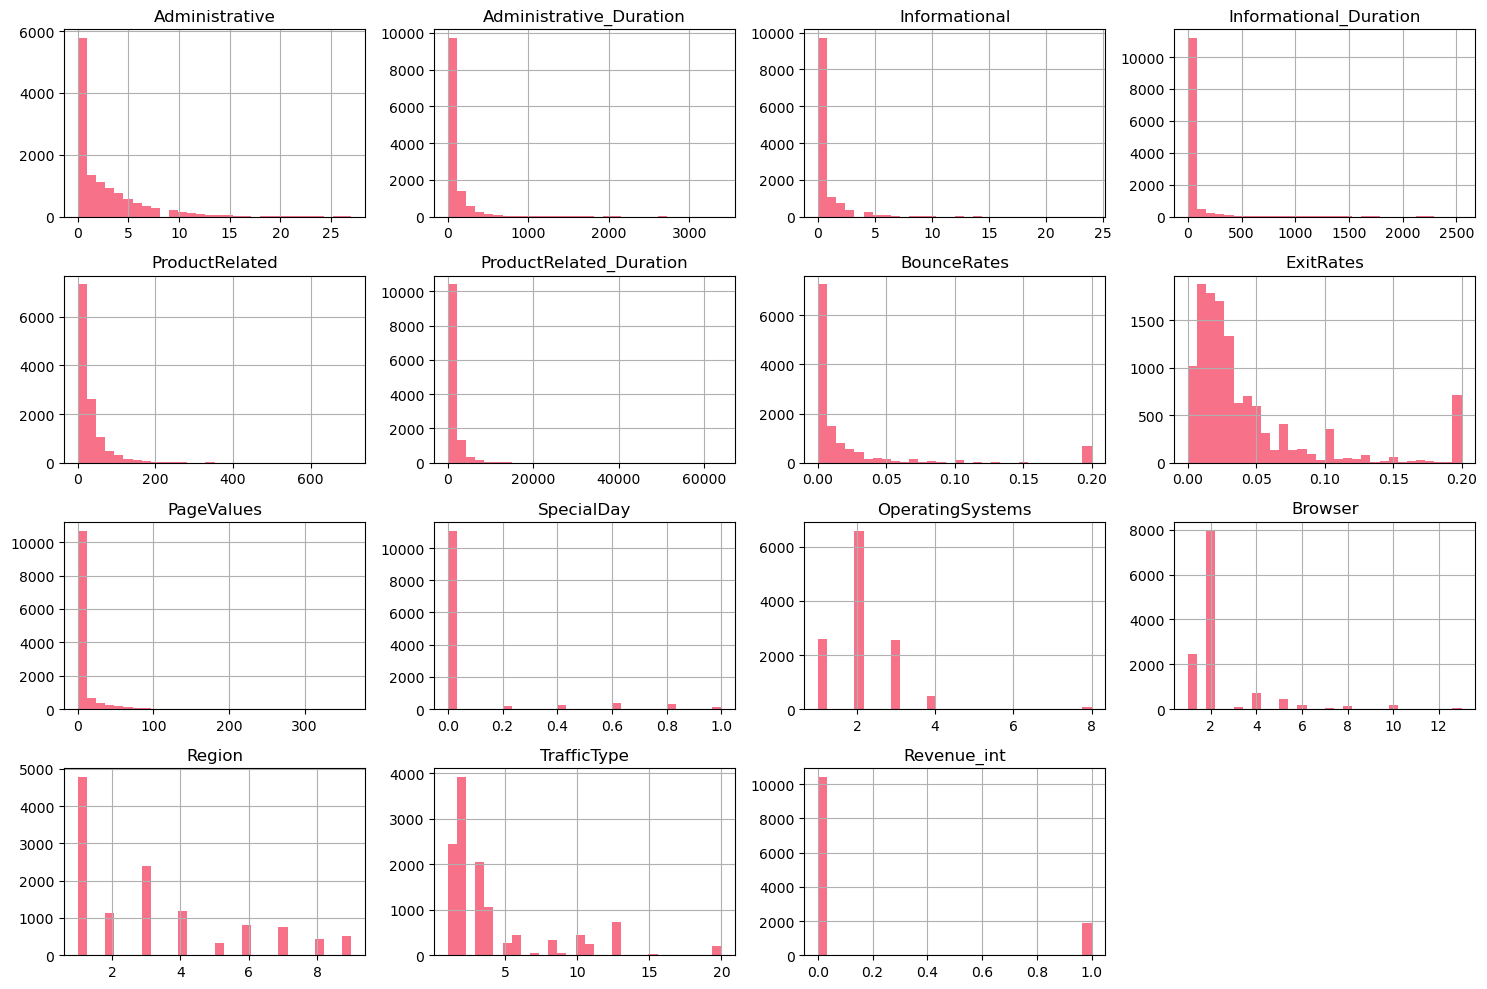

In [33]:
# looking at distribution of data, seeing if there are any identifyiable outliers as well
df.hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()


Revenue_int                1.000000
PageValues                 0.492569
ProductRelated             0.158538
ProductRelated_Duration    0.152373
Administrative             0.138917
Informational              0.095200
Administrative_Duration    0.093587
Informational_Duration     0.070345
Browser                    0.023984
TrafficType               -0.005113
Region                    -0.011595
OperatingSystems          -0.014668
SpecialDay                -0.082305
BounceRates               -0.150673
ExitRates                 -0.207071
dtype: float64


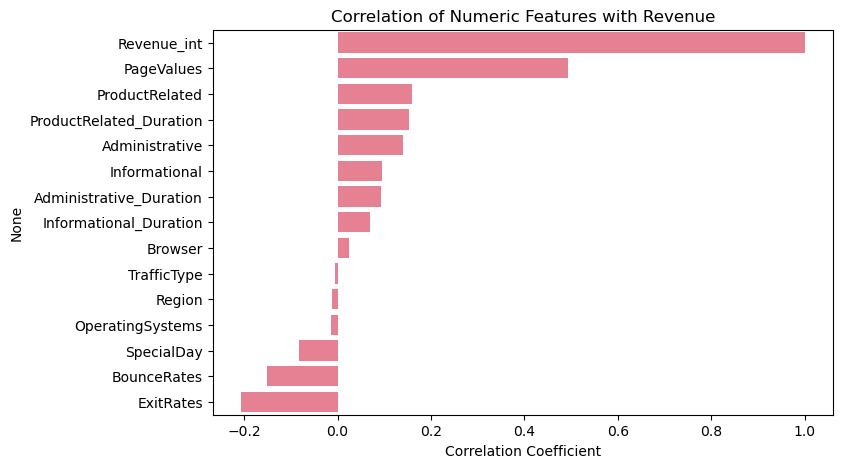

In [34]:
#correlating variables against my target variable "Revenue"!

num_df = df.select_dtypes(include=[np.number])
df["Revenue_int"] = df["Revenue"].astype(int)

corr_with_target = num_df.corrwith(df["Revenue_int"]).sort_values(ascending=False)
print(corr_with_target)

plt.figure(figsize=(8,5))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index)
plt.title("Correlation of Numeric Features with Revenue")
plt.xlabel("Correlation Coefficient")
plt.show()

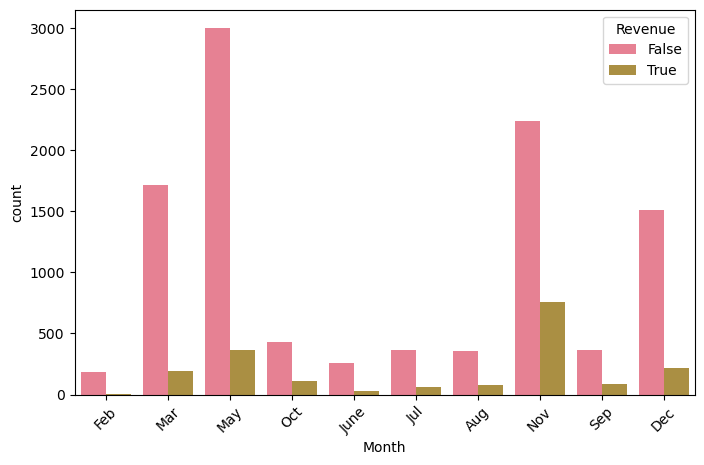

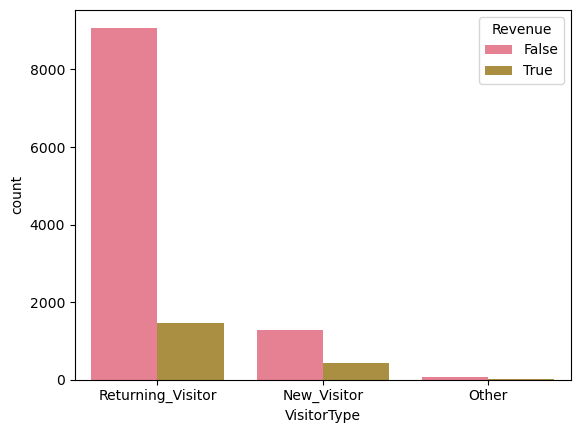

In [ ]:
# looking at how revenue trends by month 
plt.figure(figsize=(8,5))
sns.countplot(x="Month", hue="Revenue", data=df)
plt.xticks(rotation=45)
plt.show()

# looking at how revenue trends by visitor type
sns.countplot(x="VisitorType", hue="Revenue", data=df)
plt.show()



# Understanding Our Trends: Month x Revenue, Visitor Type x Revenue
The first graph shows that many people were actually looking at sites in May but did NOT make a purchase, as the revenue count for FALSE is much higher than TRUE. This is the case for every other month as well, but may is the highest month interestingly. No one wants to get a present for their mom...

It is also interesting that returning visitors are much more likely to make a purchase than new visitors or other types of visitors.BUT also at the same time returning visitors DO NOT make a purchase more often than new visiors do.

# HYPOTHESIS TESTING:

### Hypothesis 1: 
**H1:** the product related duration impacts the probability of a purchase (revenue)
- **Null Hypothesis (H0):** there is no association between productrelated_duration and purchase outcome
- **Alternative Hypothesis (H1):** sessnions that end in a purchase have greater productrelated_duration than sessions that do not
- **Rationale:** I expect this relationship to exist because it would make sense that the longer you spend on a website, the more research one is doing, demonstrating some sort of investment in a product, making it more likely for someone to buy.

### Hypothesis 2: 
**H2:** the probability of a purchase is impacted by the proximity to a special day
- **Null Hypothesis (H0):** the proximity to a special day is not associated with purchase probability 
- **Alternative Hypothesis (H1):** sessions closer to a special day are more likely to purchase 
- **Rationale:** typically when there is a special day, like mothers day, more people buy things with intention because of the special day, making the rate of people that purchase increase.

### Hypothesis 3: 
**H3:** rate of a purchase being impacted by being on a weekend or weekday
- **Null Hypothesis (H0):** weekend or weekdays have no impact on rate of purchase
- **Alternative Hypothesis (H1):** [State alternative hypothesis]
- **Rationale:** [Explain why you think this relationship exists]

# HYPOTHESIS 1 - product related duration and revenue

In [ ]:

#HYPOTHESIS 1:

# # p value test for if having a purchase duration increases revenue 
buyers = df[df["Revenue"]==True]["ProductRelated_Duration"]
non_buyers = df[df["Revenue"]==False]["ProductRelated_Duration"]

tstat, pval = stats.ttest_ind(buyers, non_buyers, equal_var=False)
print("t-test for ProductRelated_Duration:", tstat, pval)



t-test for ProductRelated_Duration: 14.44698899755261 2.1737910437734824e-45


### Interpretation
Using a T-test with a P-value of 2.1737910437734824e-45, deeming it statistically signifcant, we can say that we can reject the Null hypothesis. A t-test is appropriate because it is fitting to use with categorical variables and numerical ones.Sessions with longer time spent on product pages were significantly more likely to result in a purchase. This supports the idea that greater engagement with product content increases buying intent and outcome! 

# HYPOTHESIS 2 - special day proximity and revenue

SpecialDay_bin  Not Special  Near Special  Special Day
Month                                                 
Aug                0.175520           NaN          NaN
Dec                0.125072           NaN          NaN
Feb                0.009524       0.00000     0.046512
Jul                0.152778           NaN          NaN
June               0.100694           NaN          NaN
Mar                0.100682           NaN          NaN
May                0.132299       0.07013     0.060991
Nov                0.253502           NaN          NaN
Oct                0.209472           NaN          NaN
Sep                0.191964           NaN          NaN


/var/folders/h7/q8rh5lys2538ddz0q7hbgrt40000gn/T/ipykernel_52011/3637141475.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conversion_by_month_sd = df.groupby(['Month', 'SpecialDay_bin'])['Revenue'].mean().unstack()


<Figure size 1200x600 with 0 Axes>

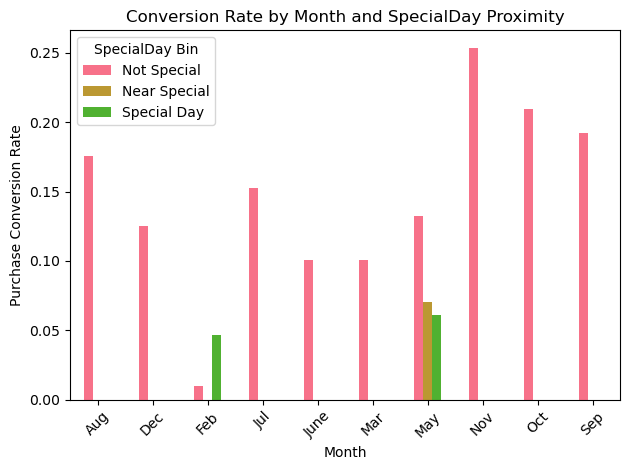

T-test between 'Special Day' and 'Not Special': t=-11.688, p=0.0000


In [ ]:
#HYPOTHESIS 2:
# p value test for if being near a special day increases revenue

# Group by Month and SpecialDay bins, calculate conversion rate
df['SpecialDay_bin'] = pd.cut(df['SpecialDay'], bins=[-0.01, 0.0, 0.5, 1.0], labels=['Not Special', 'Near Special', 'Special Day'])

conversion_by_month_sd = df.groupby(['Month', 'SpecialDay_bin'])['Revenue'].mean().unstack()
print(conversion_by_month_sd)

# Visualize conversion rates by month and SpecialDay proximity
plt.figure(figsize=(12,6))
conversion_by_month_sd.plot(kind='bar', stacked=False)
plt.ylabel('Purchase Conversion Rate')
plt.title('Conversion Rate by Month and SpecialDay Proximity')
plt.xticks(rotation=45)
plt.legend(title='SpecialDay Bin')
plt.tight_layout()
plt.show()

# Statistical test: Compare conversion rates for 'Special Day' vs 'Not Special' across all months
special = df[df['SpecialDay_bin'] == 'Special Day']['Revenue']
not_special = df[df['SpecialDay_bin'] == 'Not Special']['Revenue']
tstat, pval = stats.ttest_ind(special, not_special, equal_var=False)
print(f"T-test between 'Special Day' and 'Not Special': t={tstat:.3f}, p={pval:.4f}")

### Interpretation
Using a T-test with a P-value of 0.0000,deeming it statistically signifcant, we can say that we can reject the Null hypothesis. A t-test is appropriate because it is appropriate for analyzing categorical variables among numerical ones. Results were statistically significant, but the indicators that reveal the proximity to a special day marked the months of may and februrary for mothers day and valentines day, and there were not higher revenue rates for those months. November had the highest revenue rate, which does make sense for black friday/holiday season, but that was not indicated by the special day variable in the dataset

# HYPOTHESIS 3 - weekend/weekday and revenue

In [44]:
# Contingency table for Weekend vs Revenue
ct = pd.crosstab(df["Weekend"], df["Revenue"])
print(ct)

# Chi-square test
chi2, pval, dof, exp = stats.chi2_contingency(ct)
print(f"Chi-square test for Weekend vs Revenue: chi2={chi2:.3f}, p-value={pval:.4f}")

Revenue  False  True 
Weekend              
False     8053   1409
True      2369    499
Chi-square test for Weekend vs Revenue: chi2=10.391, p-value=0.0013


Weekend
False    0.148911
True     0.173989
Name: Revenue, dtype: float64


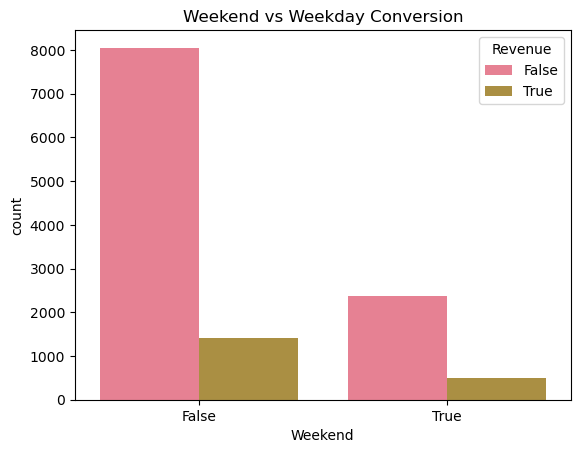

In [ ]:

# Conversion rates
print(df.groupby("Weekend")["Revenue"].mean())

sns.countplot(x="Weekend", hue="Revenue", data=df)
plt.title("Weekend vs Weekday Conversion")
plt.show()


### Interpretation
Using CHI-SQUARED, we get a p-value of 0.0013, deeming it statistically significant, allowing us to reject the Null Hypothesis. Although the difference in conversion rates between weekends and weekdays was statistically significant (p = 0.0013), the effect size was small. So even if weekend behavior differs slightly, it does not have substantial practical impact on purchase outcomes

## 5. Summary and Conclusions

### Key Findings from EDA:
 85 percent of sessions did NOT end in a purchase. users viewed an average of 32 pages of products, but only 2 administrative pages and 0.5 info pages-- making the emphasis for users on shopping content. the average bounce rates and exit rates for users were moderately low. product related durations were the longest, because they had the highest mean, but also varied heavily.    


Relationships Observed:

- Longer product-related duration → higher purchase likelihood.
- Most numerical distributions were right skewed.
- Slightly higher purchase rates near special days, especially in later months.
- No missing values detected
- purchases are relatively rare
- Lots of people did not decide to buy in the month of May
- More people bought in the month of November
- target variable is imbalanced in context of dataset

### Hypothesis Testing Results:

| Hypothesis | Test Used | p-value | Result | Interpretation |
|------------|-----------|---------|--------|-----------------|
| **H1** | T-TEST | [2.1737910437734824e-45] | [Significant] | Reject Null Hypothesis. Sessions with longer time spent on product pages were significantly more likely to result in a purchase. This supports the idea that greater engagement with product content increases buying intent and outcome! |
| **H2** | T-TEST | [0.0000] | [Significant] | Reject Null hypothesis.Results were statistically significant, but the indicators that reveal the proximity to a special day marked the months of may and februrary for mothers day and valentines day, and there were not higher revenue rates for those months. November had the highest revenue rate, which does make sense for black friday/holiday season, but that was not indicated by the special day variable in the dataset.|
| **H3** | CHI-SQUARED | [p-value=0.0013] | [Significant] | Reject Null Hypothesis.Although the difference in conversion rates between weekends and weekdays was statistically significant (p = 0.0013), the effect size was small. So even if weekend behavior differs slightly, it does not have substantial practical impact on purchase outcomes. |



### Key Insights:

* The results suggest that time spent on product-related pages (ProductRelated_Duration) is strongly associated with making a purchase, confirming that longer more engaged browsing on product sites increases the likelihood to buy.
* assessing revenue rates based on proximity to a special day was statistically significant, but the indicators that reveal the proximity to a special day marked the months of may and februrary for mothers day and valentines day, and there were not higher revenue rates for those months. November had the highest revenue rate, which does make sense for black friday/holiday season, but that was not indicated by the special day variable in the dataset. Yet, the relationship still stands. 
* Although the weekend effect was statistically significant (p = 0.0013), there was no real increase in purchase rates on the weekend vs the weekday; meaning other variables are impacting the likelihood of a purchase instead.

### Practical Implications:

* Since we have learned that product-related durations increase the likelihood of making a purchase, online retailers can prioritize more engagement strategies to make users stay longer on their site, maybe such things as related products, ideas to use products for, reviews/forums, etc.
* Even though our results are misleading for hypothesis 2, it is still safe to say that marketing campaigns could be implemented by companies near special holidays, obviously in proportion to predicted profits.the increase in revenue in november and december demonstrate this. 
* Since weekend browsing patterns show minor differences, companies might not need to heavily adjust their scheduling or promotional tactics for weekends.

### Limitations:

* The dataset is limited to only session-level data and doesn’t include user demographics, which can definitely impact intention in purchasing behavior!!!!
* The special day variable did not quite apply to most holidays, making findings unclear.
* Revenue being binary oversimplifies purchase intent, we can't really know more
* 85 percent of users did not make a purchase, making there much less data to understand why purchases are being made rather than not.

### Future Research:

* Use other regression models to control for multiple factors simultaneously.
* Explore with more variables like time of day, or type of device to see if that has an impact.
* Use other demographic variables to understand trends in tandem with user session data. 
* Integrate other user-level data like repeat visits to better understand long-term behavior.




---


